<a href="https://colab.research.google.com/github/XingruiWang/RUC-Deep-Learning-Course/blob/master/Homework/HW_5/%E7%8E%8B%E5%85%B4%E7%9D%BF_2017201690_DL_W05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 使用AlexNet实现基于cifar10数据集的图片分类问题

### 一、模型搭建 AlexNet

In [1]:
# 参考pytorch版本 https://github.com/icpm/pytorch-cifar10/blob/master/models/AlexNet.py
import tensorflow as tf
import keras
from keras.layers import Activation,Conv2D, BatchNormalization, Dense
from keras.layers import Dropout, Flatten, Input, MaxPooling2D, ZeroPadding2D
from keras import Model

num_classes = 10 #cifar-10数据集为10分类问题，类别数为10
IMSIZE = 32 #和cifar-10数据集中图⽚⼤⼩⼀致
input_layer = Input([IMSIZE,IMSIZE,3])
x = input_layer

x = Conv2D(64,[3,3],strides = [2,2], activation = 'relu')(x) 
x = MaxPooling2D([2,2])(x)    
x = Conv2D(192,[3,3],padding = "same", activation = 'relu')(x)
x = MaxPooling2D([3,3], strides = [2,2])(x)
x = Conv2D(384,[3,3],padding = "same", activation = 'relu')(x) 
x = Conv2D(256,[3,3],padding = "same", activation = 'relu')(x) 
x = Conv2D(256,[3,3],padding = "same", activation = 'relu')(x) 
x = MaxPooling2D([2,2])(x)

x = Flatten()(x)   
x = Dense(4096,activation = 'relu')(x)
x = Dropout(0.5)(x)
x = Dense(4096,activation = 'relu')(x)
x = Dropout(0.5)(x)
x = Dense(num_classes, activation = 'softmax')(x) 
output_layer=x
model=Model(input_layer,output_layer)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 15, 15, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 192)         110784    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 192)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 384)         663936    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 256)        

### 一、实验准备
#### 1. 导入数据集

In [2]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


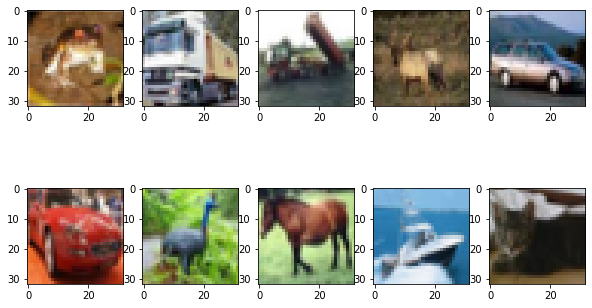

In [3]:
from matplotlib import pyplot as plt

fig,ax = plt.subplots(2,5)
fig.set_figheight(6)
fig.set_figwidth(10)
ax=ax.flatten()
# 展示前十张训练集图片
for i in range(10):
    ax[i].imshow(x_train[i])

In [4]:
# 数据预处理
from keras.utils import np_utils
N_train=x_train.shape[0];N_test=x_test.shape[0]
print([N_train,N_test]) #训练集与测试集⼤⼩
#统一图片分辨率（reshape to 32 * 32），并归一化（/225）
x_train = x_train.reshape(N_train,32,32,3)/255
x_test = x_test.reshape(N_test,32,32,3)/255
# one-hot 编码
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

[50000, 10000]


In [5]:
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
model.compile(loss = 'categorical_crossentropy',optimizer='adam',metrics = ['accuracy'])

# 将测试集mse最小的模型保存到 weights.best.hdf5
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# history = model.fit(x_train,y_train,epochs = 10,batch_size = 200,validation_data=(x_test,y_test))
history = model.fit(x_train, y_train, validation_data=(x_test,y_test), batch_size=128, epochs=200, 
                    callbacks=callbacks_list, verbose=1)

Epoch 1/200
391/391 [==============================] - ETA: 0s - loss: 1.9178 - accuracy: 0.2446
Epoch 00001: val_accuracy improved from -inf to 0.41620, saving model to weights.best.hdf5
391/391 [==============================] - 7s 18ms/step - loss: 1.9178 - accuracy: 0.2446 - val_loss: 1.5267 - val_accuracy: 0.4162
Epoch 2/200
389/391 [============================>.] - ETA: 0s - loss: 1.3613 - accuracy: 0.4993
Epoch 00002: val_accuracy improved from 0.41620 to 0.56740, saving model to weights.best.hdf5
391/391 [==============================] - 6s 16ms/step - loss: 1.3608 - accuracy: 0.4996 - val_loss: 1.2231 - val_accuracy: 0.5674
Epoch 3/200
389/391 [============================>.] - ETA: 0s - loss: 1.1242 - accuracy: 0.5997
Epoch 00003: val_accuracy improved from 0.56740 to 0.59620, saving model to weights.best.hdf5
391/391 [==============================] - 6s 17ms/step - loss: 1.1236 - accuracy: 0.5999 - val_loss: 1.1642 - val_accuracy: 0.5962
Epoch 4/200
389/391 [=============

### 三、模型评估

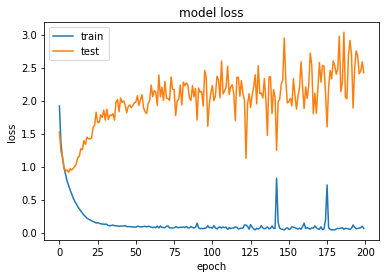

In [7]:
# 绘制 loss和 val_loss 的收敛情况
plt.plot(history.history['loss'][:200])
plt.plot(history.history['val_loss'][:200])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

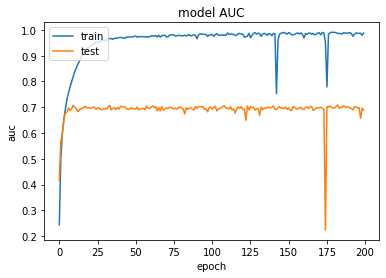

In [8]:
# 绘制 loss和 val_loss 的收敛情况
plt.plot(history.history['accuracy'][:200])
plt.plot(history.history['val_accuracy'][:200])
plt.title('model AUC')
plt.ylabel('auc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

模型最终在测试集上收敛到0.7左右